Based on https://www.kaggle.com/code/sanchitakarmakar/heart-failure-prediction-visualization
https://www.kaggle.com/code/durgancegaur/a-guide-to-any-classification-problem#Exploratory-Data-Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [11]:
px.imshow(df.corr(),title="Correlation Plot of the Heat Failure Prediction")

In [12]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

[0.09355163 0.0274303  0.07544018 0.03051725 0.13411593 0.02342482
 0.07605102 0.11849791 0.08716957 0.02960092 0.0269873  0.27721317]


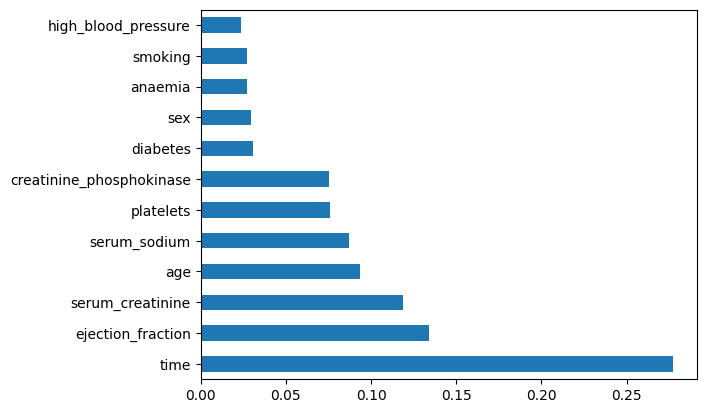

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [19]:
fig=px.histogram(df, 
                 x="DEATH_EVENT",
                 color="sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

/home/aldona/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/tmp/ipykernel_15678/2949560456.py:5: UserWarning:

The figure layout has changed to tight



[]

<Figure size 1500x1000 with 0 Axes>

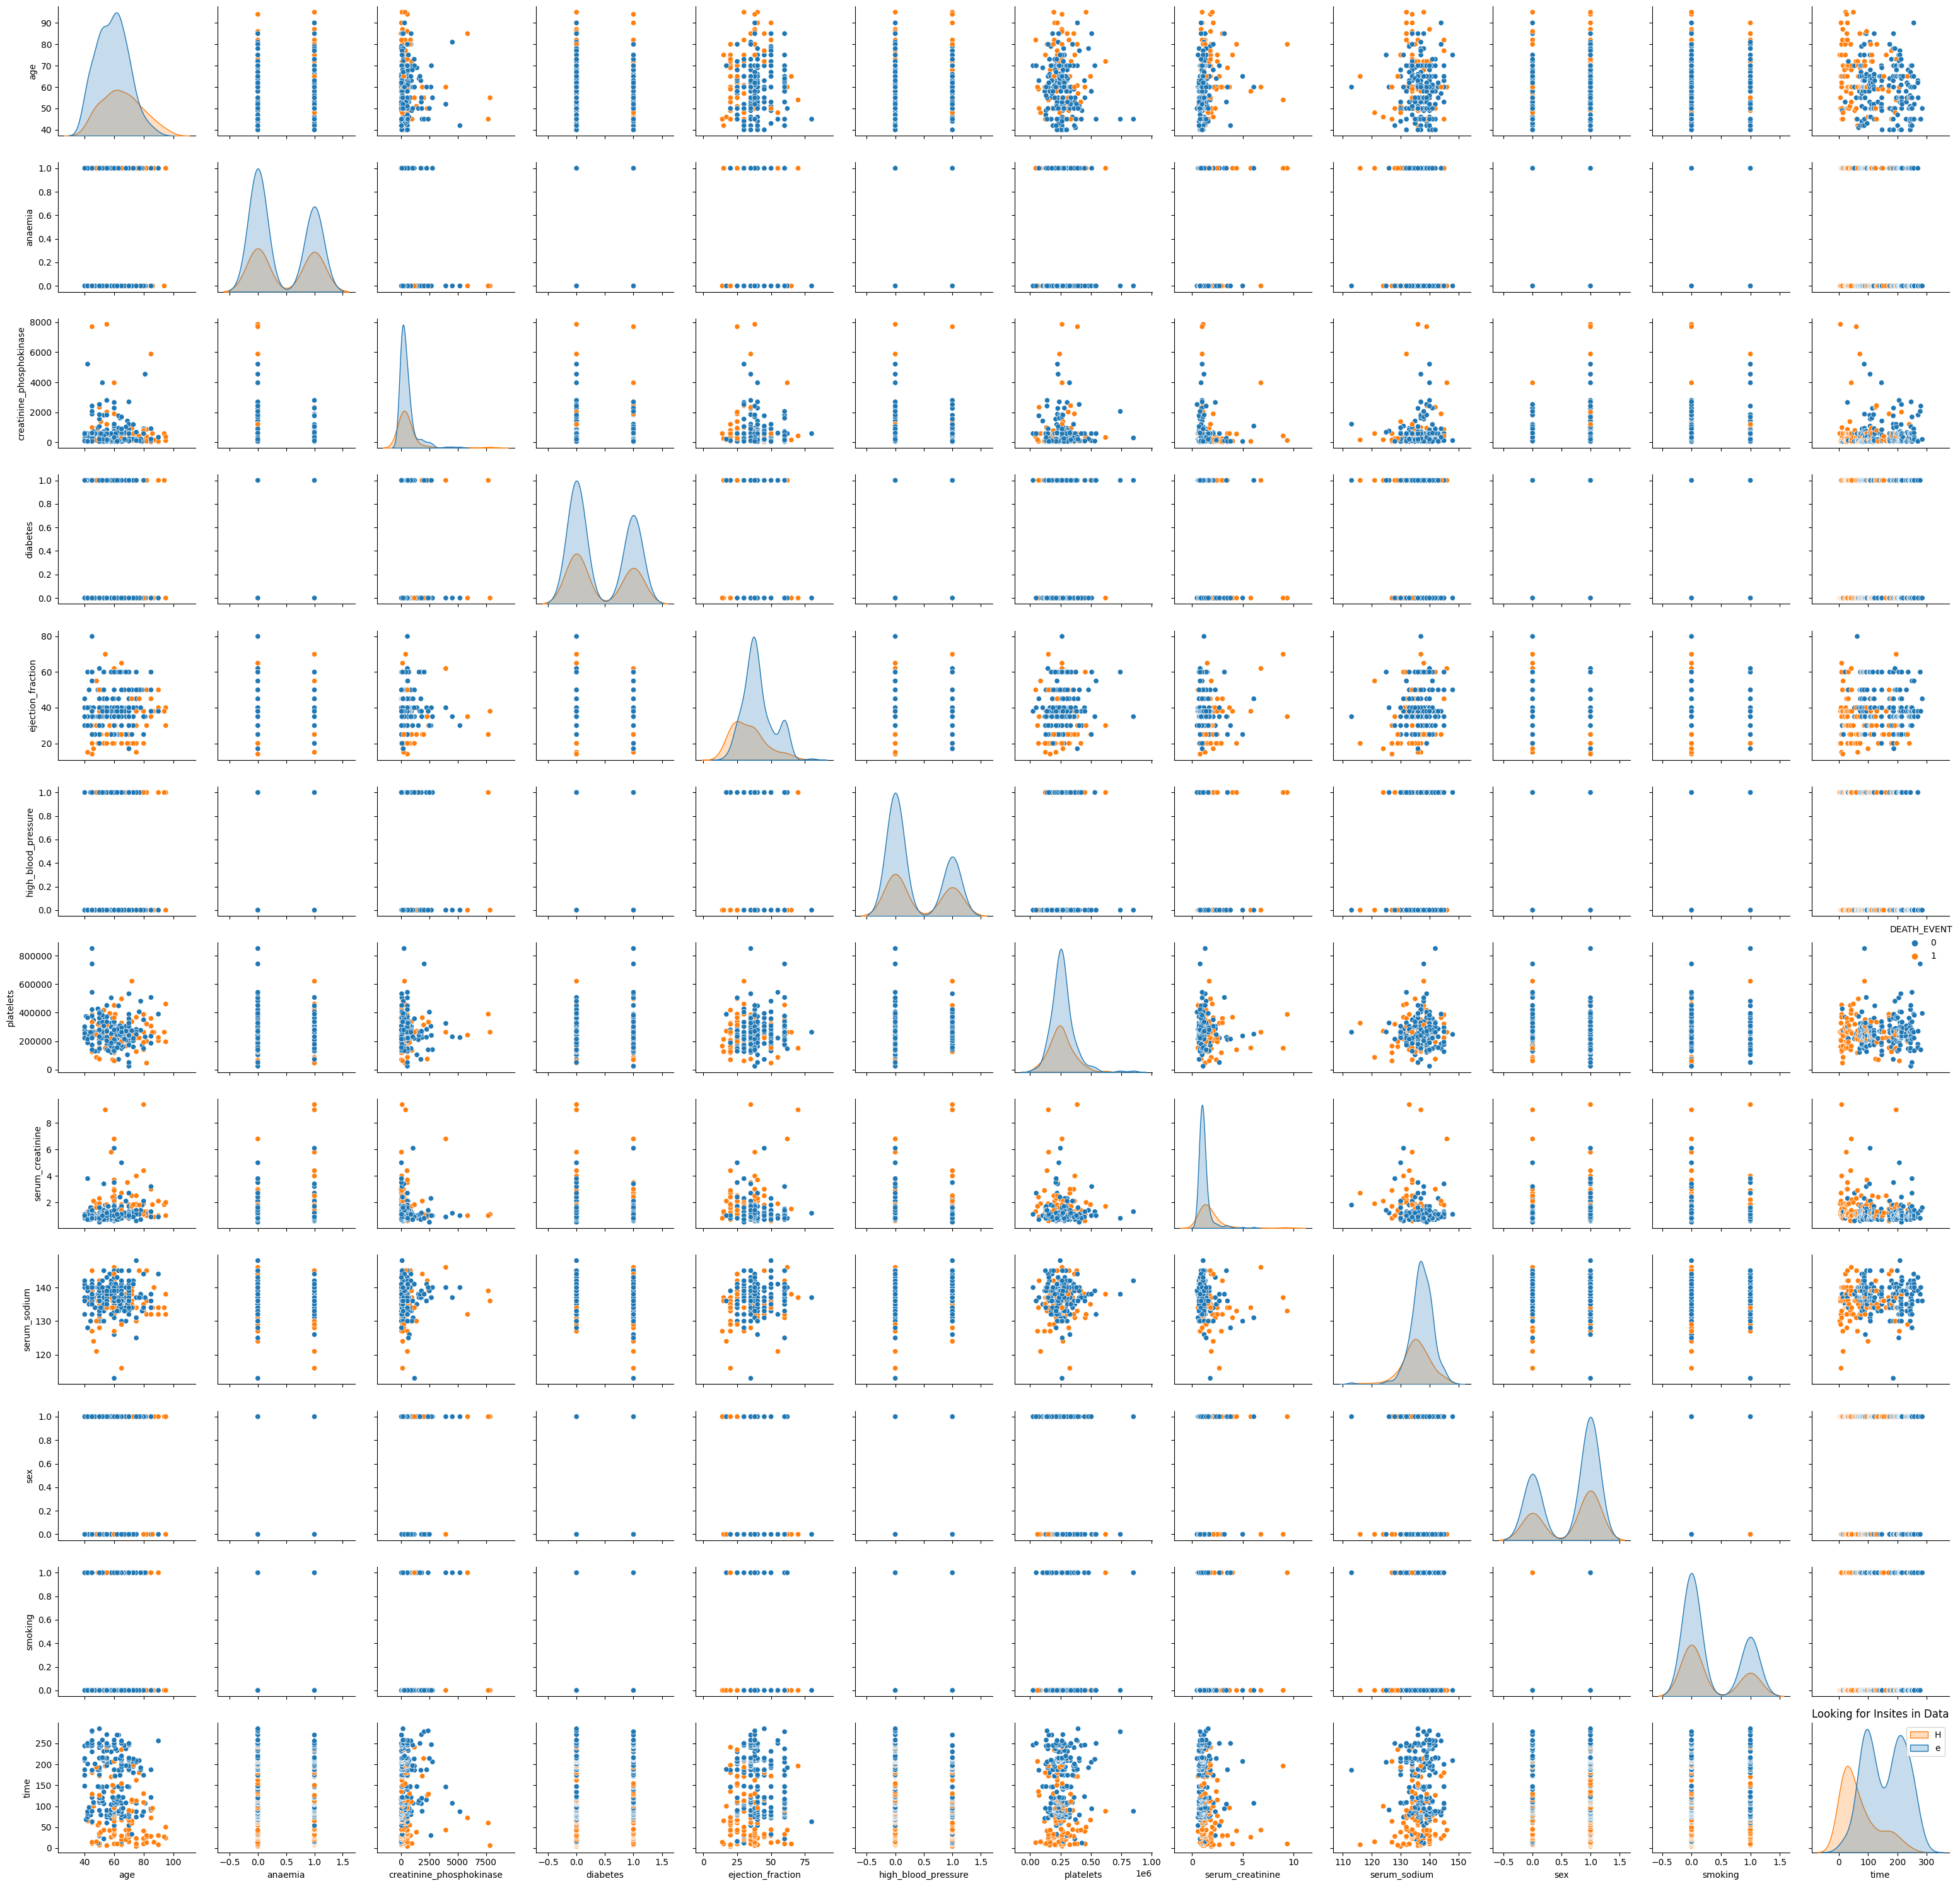

In [20]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="DEATH_EVENT")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [10]:
df_hist=df.drop('high_blood_pressure', axis=1)

In [11]:
df_hist

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,140000.00,1.4,140,1,1,280,0


/tmp/ipykernel_4522/3590963146.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_4522/3590963146.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_4522/3590963146.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_4522/3590963146.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_4522/3590963146.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_4522/3590963146.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_4522/3590963146.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_4522/3590963146.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_4522/3590963146.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipyke

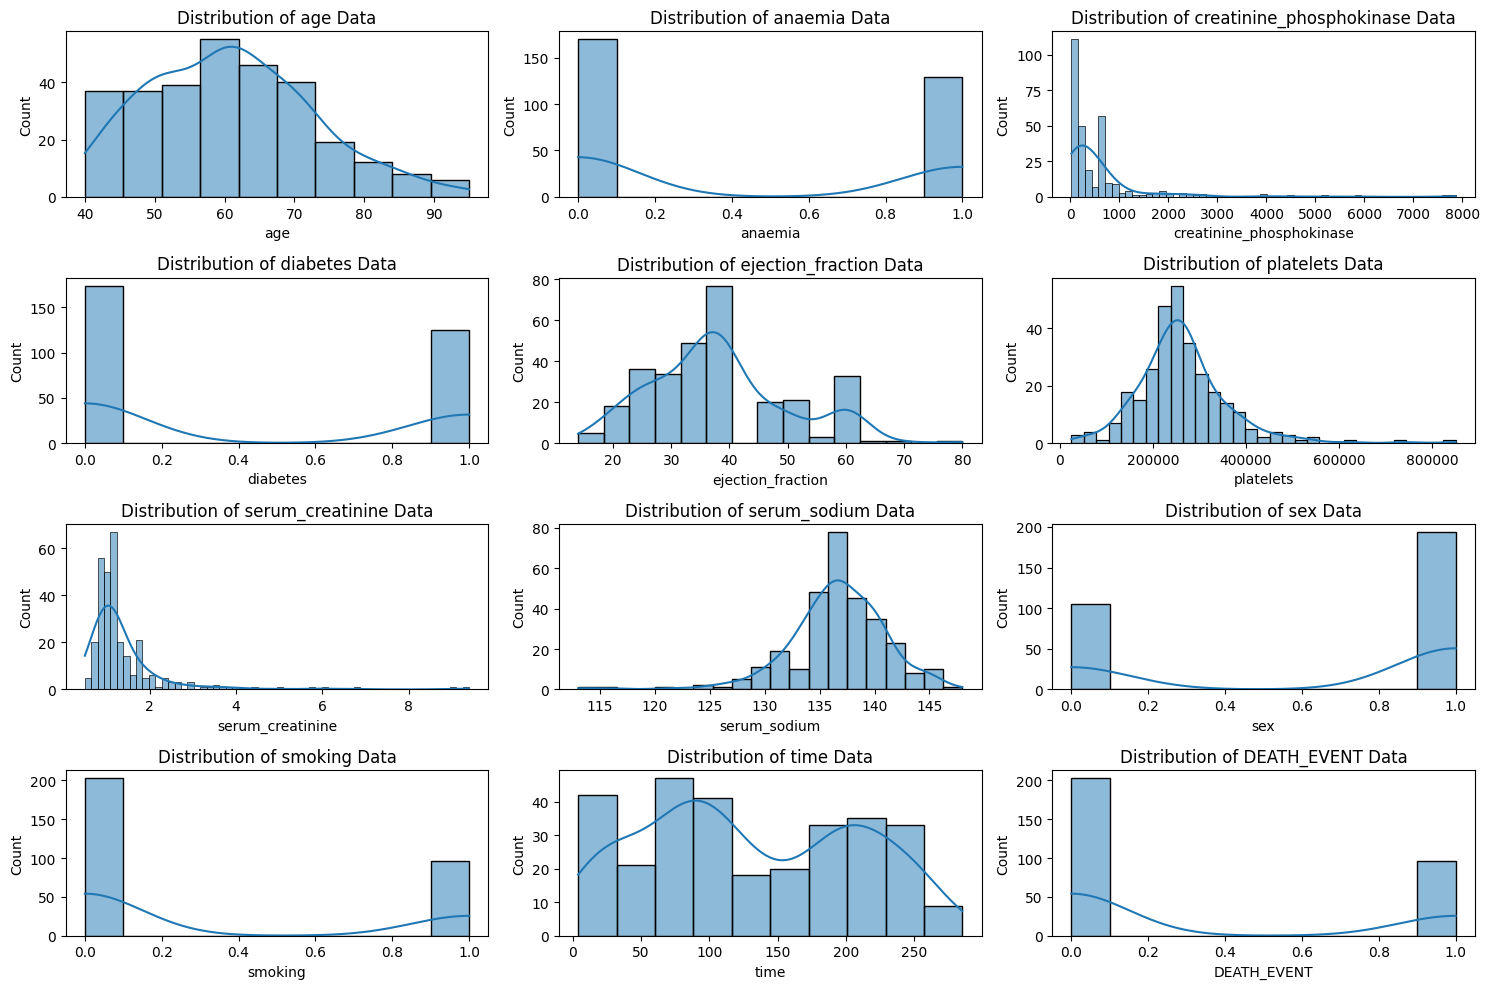

In [12]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df_hist.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_hist[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [ ]:
Outliers

In [22]:
fig = px.box(df,y="age",x="DEATH_EVENT",title=f"Distrubution of Age")
fig.show()

In [14]:
fig = px.box(df,y="serum_creatinine",x="DEATH_EVENT",title=f"Distrubution of serum creatine")
fig.show()

In [15]:
fig = px.box(df,y="ejection_fraction",x="DEATH_EVENT",title=f"Distrubution of ejection_fraction")
fig.show()

Data Preprocessing
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

The concepts that I will cover in this article are

Handling Null Values
Feature Scaling
Handling Categorical Variables

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [24]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

df.info()

2. Feature Scaling
Why Should we Use Feature Scaling?
The first question we need to address – why do we need to scale the variables in our dataset? Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Let me explain that in more detail.



Robust Scaler

In [16]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [17]:
df.head

<bound method NDFrame.head of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_cr

In [19]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


In [ ]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(df[['ejection_fraction', 'age','serum_creatinine','serum_sodium','platelets']])
robust_df = pd.DataFrame(robust_df, columns =['ejection_fraction', 'age','serum_creatinine','serum_sodium','platelets'])

In [20]:
robust_df

,ejection_fraction,age,serum_creatinine,serum_sodium,platelets
0,-1.200000,0.789474,1.6,-1.166667,0.032967
1,0.000000,-0.263158,0.0,-0.166667,0.014923
2,-1.200000,0.263158,0.4,-1.333333,-1.098901
3,-1.200000,-0.526316,1.6,0.000000,-0.571429
4,-1.200000,0.263158,3.2,-3.500000,0.714286
...,...,...,...,...,...
294,0.000000,0.105263,0.0,1.000000,-1.175824
295,0.000000,-0.263158,0.2,0.333333,0.087912
296,1.466667,-0.789474,-0.6,0.166667,5.274725
297,0.000000,-0.789474,0.6,0.500000,-1.340659


In [50]:
robust_df['ejection_fraction']

0     -1.200000
1      0.000000
2     -1.200000
3     -1.200000
4     -1.200000
         ...   
294    0.000000
295    0.000000
296    1.466667
297    0.000000
298    0.466667
Name: ejection_fraction, Length: 299, dtype: float64

In [67]:
mask = df.isin([0, 1]).any(axis=0)
print(mask)

age                         False
anaemia                      True
creatinine_phosphokinase    False
diabetes                     True
ejection_fraction           False
high_blood_pressure          True
platelets                   False
serum_creatinine             True
serum_sodium                False
sex                          True
smoking                      True
time                        False
DEATH_EVENT                  True
dtype: bool


[0.09641281 0.02551796 0.07389915 0.02844894 0.12795724 0.02491615
 0.0676577  0.11069236 0.08446864 0.02451945 0.02616028 0.30934932]


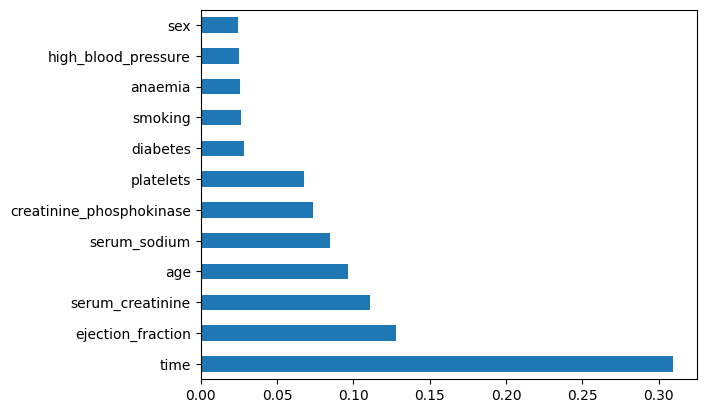

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
x,y=df.iloc[:,:12],df.iloc[:,-1]
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [70]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df[['time', 'serum_sodium','platelets', 'ejection_fraction', 'creatinine_phosphokinase', 'age']])
minmax_df = pd.DataFrame(minmax_df, columns =['time', 'serum_sodium','platelets', 'ejection_fraction', 'creatinine_phosphokinase', 'age'])

Text(0.5, 1.0, 'After Standard Scaling')

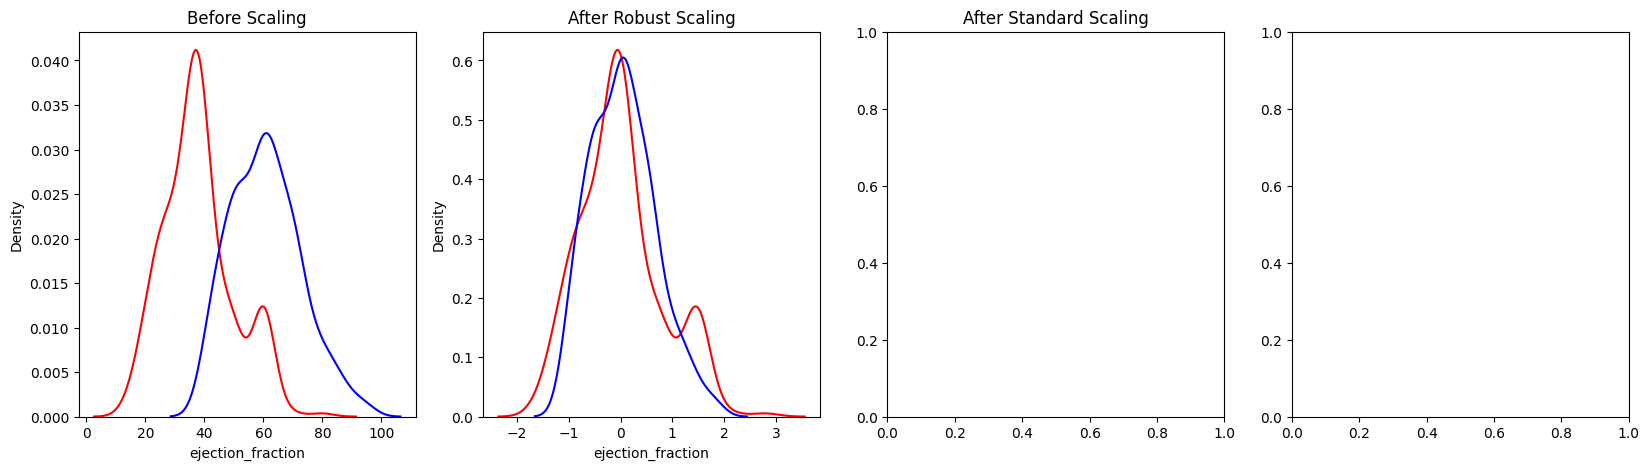

In [52]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(df['ejection_fraction'], ax = ax1, color ='r')
sns.kdeplot(df['age'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['ejection_fraction'], ax = ax2, color ='red')
sns.kdeplot(robust_df['age'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

In [29]:
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(df[['ejection_fraction']])
minmax_df = pd.DataFrame(minmax_df, columns =['ejection_fraction'])

In [82]:
columns_to_drop = [0, 2, 4, 6, 8, 11]

# Usuwanie kolumn
df_dropped = df.drop(df.columns[columns_to_drop], axis=1)

In [84]:
df_minmax=pd.concat([df_dropped,minmax_df], axis=1)

In [85]:
df_minmax

,anaemia,diabetes,high_blood_pressure,serum_creatinine,sex,smoking,DEATH_EVENT,time,serum_sodium,platelets,ejection_fraction,creatinine_phosphokinase,age
0,0,0,1,1.9,1,0,1,0.000000,0.485714,0.290823,0.090909,0.071319,0.636364
1,0,0,0,1.1,1,0,1,0.007117,0.657143,0.288833,0.363636,1.000000,0.272727
2,0,0,0,1.3,1,1,1,0.010676,0.457143,0.165960,0.090909,0.015693,0.454545
3,1,0,0,1.9,1,0,1,0.010676,0.685714,0.224148,0.090909,0.011227,0.181818
4,1,1,0,2.7,0,0,1,0.014235,0.085714,0.365984,0.090909,0.017479,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,1,1,1.1,1,1,0,0.946619,0.857143,0.157474,0.363636,0.004848,0.400000
295,0,0,0,1.2,0,0,0,0.950178,0.742857,0.296884,0.363636,0.229268,0.272727
296,0,1,0,0.8,0,0,0,0.975089,0.714286,0.869075,0.696970,0.259888,0.090909
297,0,0,0,1.4,1,1,0,0.982206,0.771429,0.139290,0.363636,0.304925,0.090909


vizualization depends on DEATH EVENTS

In [38]:
df_plot=df.iloc[:,:11]

In [39]:
df_plot

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1


In [48]:
import plotly.express as px
for i in df_plot.columns:

    fig = px.histogram(df, x=i, color="DEATH_EVENT", marginal="violin",hover_data=i,
                   title =f"Distribution of {i} Vs DEATH_EVENT", 
                   labels={i},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"})
    fig.show()

In [86]:
x = df.iloc[:, [6]].values
y = df.iloc[:,6].values

In [87]:
x

array([[265000.  ],
       [263358.03],
       [162000.  ],
       [210000.  ],
       [327000.  ],
       [204000.  ],
       [127000.  ],
       [454000.  ],
       [263358.03],
       [388000.  ],
       [368000.  ],
       [253000.  ],
       [136000.  ],
       [276000.  ],
       [427000.  ],
       [ 47000.  ],
       [262000.  ],
       [166000.  ],
       [237000.  ],
       [ 87000.  ],
       [276000.  ],
       [297000.  ],
       [289000.  ],
       [368000.  ],
       [263358.03],
       [149000.  ],
       [196000.  ],
       [284000.  ],
       [153000.  ],
       [200000.  ],
       [263358.03],
       [360000.  ],
       [319000.  ],
       [302000.  ],
       [188000.  ],
       [228000.  ],
       [226000.  ],
       [321000.  ],
       [305000.  ],
       [329000.  ],
       [263358.03],
       [153000.  ],
       [185000.  ],
       [218000.  ],
       [194000.  ],
       [310000.  ],
       [271000.  ],
       [451000.  ],
       [140000.  ],
       [395000.  ],


In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =0)